In [ ]:



import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint
import numpy as np

m1=100
m2=200

G=100
state10=(0,0,0,1,1,-1)
state20=(10,10,10,-1,-1,1)

t=np.linspace(0,20,1000)
while t<20:
    

r=((m1*state10[0]+m2*state20[0])/(m1+m2),(m1*state10[1]+m2*state20[1])/(m1+m2),(m1*state10[2]+m2*state20[2])/(m1+m2))

r0=((r[0]**2)+(r[1]**2)+(r[2]**2))

r1=(r[0]-state10[0],r[1]-state10[1],r[2]-state10[2])
δ=np.linalg.norm(r1)
r01=(r1[0]/δ,r1[1]/δ,r1[2]/δ)


r2=(r[0]-state20[0],r[1]-state20[1],r[2]-state20[2])
ψ=np.linalg.norm(r2)
r02=(r2[0]/ψ,r2[1]/ψ,r2[2]/ψ)



φ=((G*m1*m1)/r0)


def am1(state1,t):
    x1,y1,z1,vx1,vy1,vz1=state1
    ax1=φ*r01[0]/m1
    ay1=φ*r01[1]/m1
    az1=φ*r01[2]/m1
    return (vx1,vy1,vz1,ax1,ay1,az1)

def am2(state2,t):
    x2,y2,z2,vx2,vy2,vz2=state2
    ax2=φ*r02[0]/m2
    ay2=φ*r02[1]/m2
    az2=φ*r02[2]/m2
    return (vx2,vy2,vz2,ax2,ay2,az2)



sol1=odeint(am1,state10,t)
sol2=odeint(am2,state20,t)




In [85]:
state10[4]

1

(-30.0, 30.0)

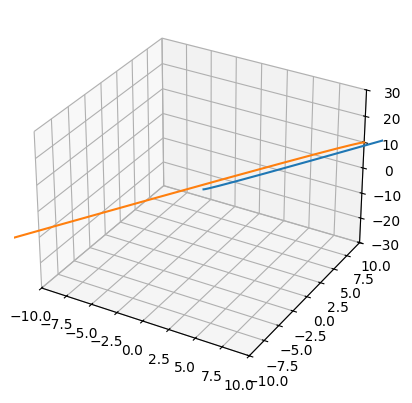

In [86]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

ax.plot(sol1.T[0],sol1.T[1],sol1.T[2])
ax.plot(sol2.T[0],sol2.T[1],sol2.T[2])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-30,30)